# Algoritmos de ML para visão computacional (MediaPipe)

A mediapipe oferece algumas soluções de ML, personalizáveis e multiplataforma, para reconhecimento de faces, objetos, mãos, entre outros. 

Ao longo desse notebook, serão apresentados alguns exemplos de utilização dessa ferramenta. 

# Segmentação de selfie

É a segmentação de uma imagem de uma pessoa, o que não representa a pessoa é substituido por outra imagem de fundo. 

## Utilizando Imagem 

Primeira é realizado uma segmentação de uma imagem fixa e em seguida é gerado o código para a realização da segmentação pela webcan

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Atribuindo um nome para chamar a função de segmentação de selfie
mp_selfie_segmentation = mp.solutions.selfie_segmentation

# Buscando as imagem desejada
file = '../Imagens/Eu.jpg'

In [3]:
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Converter a imagem BGR em RGB e realizar o processamento
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


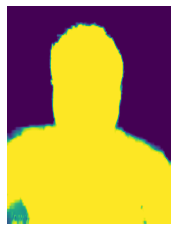

In [4]:
# Desenhar a segmentação do fundo da imagem
plt.imshow(results.segmentation_mask)
plt.axis('off')
plt.show()

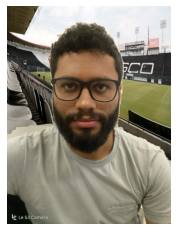

In [5]:
# Gerar condições True ou False para a segmentação
# True é a segmentação da frente da imagem e False é a segmentação do fundo
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

# Customizar imagem de fundo (background), atualizando o as cores e dimensões
img_bg = cv2.imread('../Imagens/sao_januario.jpg')
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_RGB2BGR)
bg_image = cv2.resize(img_bg, (960,1280), interpolation = cv2.INTER_AREA)
        
# Preenchendo a imagem final
output_image = np.where(condition, image, bg_image)
        
# Plotar imagem final
plt.imshow(output_image)
plt.axis('off')
plt.show()

## Utilizando webcam

In [6]:
# Atribuindo um nome para chamar a função de segmentação de selfie
mp_selfie_segmentation = mp.solutions.selfie_segmentation

In [7]:
# Para entrada com webcan:
cap = cv2.VideoCapture(0)
with mp_selfie_segmentation.SelfieSegmentation(model_selection=1) as selfie_segmentation:
    bg_image = None
    while cap.isOpened():
        success, image = cap.read()
        # Inverter a imagem horizontalmente para a imagem aparecer espelhada
        # Converter a imagem BGR em RGB e realizar o processamento
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        results = selfie_segmentation.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Gerar condições True ou False para a segmentação
        # True é a segmentação da frente da imagem e False é a segmentação do fundo
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1

        # Customizar imagem de fundo (background), atualizando o as cores e dimensões
        img = cv2.imread('../Imagens/sao_januario.jpg')
        bg_image = cv2.resize(img, (640, 480), interpolation = cv2.INTER_AREA)

        # Preenchendo a imagem final
        output_image = np.where(condition, image, bg_image)
    
        # Mostrar imagem da webcan com o fundo
        cv2.imshow('MediaPipe Selfie Segmentation', output_image)
        
        # Aperte ESC para fechar a janela
        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()